## Econ 430
### UCLA, Master of Quantitative Economics
#### Dr. Randall R. Rojas
Note: For more details on the codes, please see our textbook; Using Python for Introductory Econometrics by F. Heiss & D. Brunner.

# Qualitative and Limited Dependent Variable Models

# 1) Linear Probability Model
## Example: Married Women's Labor Force Participation 

In [1]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
mroz = woo.dataWoo('mroz')

# y = 1 (woman in the labor force), = 0 (otherwise)
# Estimate a linear probability model:
reg_lin = smf.ols(formula='inlf ~ nwifeinc + educ + exper +'
                          'I(exper**2) + age + kidslt6 + kidsge6',
                  data=mroz)
results_lin = reg_lin.fit(cov_type='HC3')

# Print regression table:
table = pd.DataFrame({'b': round(results_lin.params, 4),
                      'se': round(results_lin.bse, 4),
                      't': round(results_lin.tvalues, 4),
                      'pval': round(results_lin.pvalues, 4)})
print(f'table: \n{table}\n')

# We can check the y_hat values for two "extreme" cases:
# Recall that for this model y_hat may be outside [0, 1], 
#  which inn theory can't happen

X_new = pd.DataFrame(
    {'nwifeinc': [100, 0], 'educ': [5, 17],
     'exper': [0, 30], 'age': [20, 52],
     'kidslt6': [2, 0], 'kidsge6': [0, 0]})
predictions = results_lin.predict(X_new)

print(f'predictions: \n{predictions}\n')

table: 
                    b      se       t    pval
Intercept      0.5855  0.1536  3.8125  0.0001
nwifeinc      -0.0034  0.0016 -2.1852  0.0289
educ           0.0380  0.0073  5.1766  0.0000
exper          0.0395  0.0060  6.6001  0.0000
I(exper ** 2) -0.0006  0.0002 -2.9973  0.0027
age           -0.0161  0.0024 -6.6640  0.0000
kidslt6       -0.2618  0.0322 -8.1430  0.0000
kidsge6        0.0130  0.0137  0.9526  0.3408

predictions: 
0   -0.410458
1    1.042808
dtype: float64



# 2) Probit Model
## Example: Married Women's Labor Force Participation

In [2]:
import wooldridge as woo
import statsmodels.formula.api as smf

mroz = woo.dataWoo('mroz')

# Estimate a probit model:
reg_probit = smf.probit(formula='inlf ~ nwifeinc + educ + exper +'
                                'I(exper**2) + age + kidslt6 + kidsge6',
                        data=mroz)
results_probit = reg_probit.fit(disp=0)
print(f'results_probit.summary(): \n{results_probit.summary()}\n')

# log likelihood value:
print(f'results_probit.llf: {results_probit.llf}\n')

# McFadden's pseudo R2:
print(f'results_probit.prsquared: {results_probit.prsquared}\n')

results_probit.summary(): 
                          Probit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                         Probit   Df Residuals:                      745
Method:                           MLE   Df Model:                            7
Date:                Sun, 07 Nov 2021   Pseudo R-squ.:                  0.2206
Time:                        15:24:00   Log-Likelihood:                -401.30
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 2.009e-45
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.2701      0.509      0.531      0.595      -0.727       1.267
nwifeinc         -0.0120      0.005     -2.484      0.013      -0.022      -0.003
educ         

# 3) Logit Model
## Example: Married Women's Labor Force Participation

In [9]:
import wooldridge as woo
import statsmodels.formula.api as smf

mroz = woo.dataWoo('mroz')

# Estimate a logit model:
#reg_logit = smf.logit(formula='inlf ~ nwifeinc + educ + exper +I(exper**2) + age + kidslt6 + kidsge6', data=mroz)
reg_logit = smf.logit(formula='inlf ~ nwifeinc + educ + exper  + age + kidslt6 + kidsge6', data=mroz)

# disp = 0 avoids printing out information during the estimation:
results_logit = reg_logit.fit(disp=0)
print(f'results_logit.summary(): \n{results_logit.summary()}\n')

# log likelihood value:
print(f'results_logit.llf: {results_logit.llf}\n')

# McFadden's pseudo R2:
print(f'results_logit.prsquared: {results_logit.prsquared}\n')

results_logit.summary(): 
                           Logit Regression Results                           
Dep. Variable:                   inlf   No. Observations:                  753
Model:                          Logit   Df Residuals:                      746
Method:                           MLE   Df Model:                            6
Date:                Tue, 29 Nov 2022   Pseudo R-squ.:                  0.2112
Time:                        20:40:20   Log-Likelihood:                -406.14
converged:                       True   LL-Null:                       -514.87
Covariance Type:            nonrobust   LLR p-value:                 3.621e-44
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8379      0.841      0.996      0.319      -0.810       2.486
nwifeinc      -0.0202      0.008     -2.446      0.014      -0.036      -0.004
educ           0.2270     

### Confusion Matrix and Other Classification Metrics

[[211 114]
 [ 82 346]]
Accuracy = 0.7397078353253652


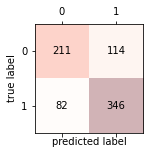

              precision    recall  f1-score   support

           0      0.720     0.649     0.683       325
           1      0.752     0.808     0.779       428

    accuracy                          0.740       753
   macro avg      0.736     0.729     0.731       753
weighted avg      0.738     0.740     0.738       753

Accuracy = 0.7397078353253652
Specificity =  0.6492307692307693
Sensitivity =  0.8084112149532711


In [18]:
# Use sklearn library
from sklearn.linear_model import LogisticRegression #problem will be solved with scikit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import matplotlib.pyplot as plt
X_cols = ['nwifeinc','educ','exper', 'age','kidslt6', 'kidsge6'] 
lr = LogisticRegression()
logit_mod = lr.fit(mroz[X_cols], mroz['inlf'])
conf_mat = confusion_matrix(mroz['inlf'], lr.predict(mroz[X_cols]))
print(conf_mat) 
print('Accuracy =', lr.score(mroz[X_cols],mroz['inlf']))

# Confusion matrix plot Raschka (2014)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i,
        s=conf_mat[i, j],
        va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

# We can print other metrics
print(classification_report(mroz['inlf'], lr.predict(mroz[X_cols]), digits=3))

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

cm1 = confusion_matrix(mroz['inlf'], lr.predict(mroz[X_cols]))
total1=sum(sum(cm1))
Accuracy = (cm1[0,0]+cm1[1,1])/total1
Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Accuracy =', Accuracy)
print('Specificity = ', Specificity)
print('Sensitivity = ', Sensitivity)

# 4) Inferences (long way vs. short way)

In [4]:
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats

mroz = woo.dataWoo('mroz')

# estimate probit model:
reg_probit = smf.probit(formula='inlf ~ nwifeinc + educ + exper +'
                                'I(exper**2) + age + kidslt6 + kidsge6',
                        data=mroz)
results_probit = reg_probit.fit(disp=0)

# test of overall significance (test statistic and p-value):
llr1_manual = 2 * (results_probit.llf - results_probit.llnull)
print(f'llr1_manual: {llr1_manual}\n')
print(f'results_probit.llr: {results_probit.llr}\n')
print(f'results_probit.llr_pvalue: {results_probit.llr_pvalue}\n')

# automatic Wald test of H0 (experience and age are irrelevant):
hypotheses = ['exper=0', 'I(exper ** 2)=0', 'age=0']
waldstat = results_probit.wald_test(hypotheses)
teststat2_autom = waldstat.statistic
pval2_autom = waldstat.pvalue
print(f'teststat2_autom: {teststat2_autom}\n')
print(f'pval2_autom: {pval2_autom}\n')

# manual likelihood ratio statistic test
# of H0 (experience and age are irrelevant):
reg_probit_restr = smf.probit(formula='inlf ~ nwifeinc + educ +'
                                      'kidslt6 + kidsge6',
                              data=mroz)
results_probit_restr = reg_probit_restr.fit(disp=0)

llr2_manual = 2 * (results_probit.llf - results_probit_restr.llf)
pval2_manual = 1 - stats.chi2.cdf(llr2_manual, 3)
print(f'llr2_manual2: {llr2_manual}\n')
print(f'pval2_manual2: {pval2_manual}\n')

llr1_manual: 227.14202283719237

results_probit.llr: 227.14202283719237

results_probit.llr_pvalue: 2.0086732957627125e-45

teststat2_autom: [[110.91852003]]

pval2_autom: 6.960738406733804e-24

llr2_manual2: 127.03401014418034

pval2_manual2: 0.0



# 5) Prediction Comparisons: Linear Model vs. Logit vs. Probit
## Example: Married Women's Labor Force Participation
>a. Estimates

In [5]:
import wooldridge as woo
import pandas as pd
import statsmodels.formula.api as smf

mroz = woo.dataWoo('mroz')

# Estimate the models:

# Linear
reg_lin = smf.ols(formula='inlf ~ nwifeinc + educ + exper +'
                          'I(exper**2) + age + kidslt6 + kidsge6',
                  data=mroz)
results_lin = reg_lin.fit(cov_type='HC3')

# Logit
reg_logit = smf.logit(formula='inlf ~ nwifeinc + educ + exper +'
                              'I(exper**2) + age + kidslt6 + kidsge6',
                      data=mroz)
results_logit = reg_logit.fit(disp=0)

# Probit
reg_probit = smf.probit(formula='inlf ~ nwifeinc + educ + exper +'
                                'I(exper**2) + age + kidslt6 + kidsge6',
                        data=mroz)
results_probit = reg_probit.fit(disp=0)

# predictions for two "extreme" women:
X_new = pd.DataFrame(
    {'nwifeinc': [100, 0], 'educ': [5, 17],
     'exper': [0, 30], 'age': [20, 52],
     'kidslt6': [2, 0], 'kidsge6': [0, 0]})
predictions_lin = results_lin.predict(X_new)
predictions_logit = results_logit.predict(X_new)
predictions_probit = results_probit.predict(X_new)

print(f'predictions_lin: \n{predictions_lin}\n')
print(f'predictions_logit: \n{predictions_logit}\n')
print(f'predictions_probit: \n{predictions_probit}\n')

predictions_lin: 
0   -0.410458
1    1.042808
dtype: float64

predictions_logit: 
0    0.005218
1    0.950049
dtype: float64

predictions_probit: 
0    0.001065
1    0.959870
dtype: float64



>b. Plots of the predictions (simulated data)

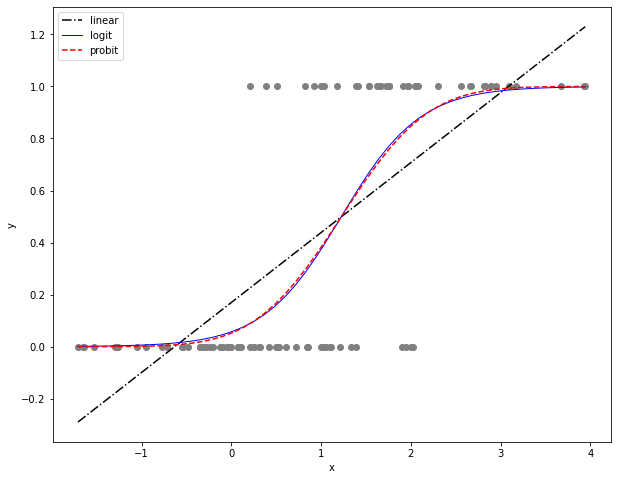

In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# set the random seed:
np.random.seed(1234567)

y = stats.binom.rvs(1, 0.5, size=100)
x = stats.norm.rvs(0, 1, size=100) + 2 * y
sim_data = pd.DataFrame({'y': y, 'x': x})

# estimation:
reg_lin = smf.ols(formula='y ~ x', data=sim_data)
results_lin = reg_lin.fit()
reg_logit = smf.logit(formula='y ~ x', data=sim_data)
results_logit = reg_logit.fit(disp=0)
reg_probit = smf.probit(formula='y ~ x', data=sim_data)
results_probit = reg_probit.fit(disp=0)

# prediction for regular grid of x values:
X_new = pd.DataFrame({'x': np.linspace(min(x), max(x), 50)})
predictions_lin = results_lin.predict(X_new)
predictions_logit = results_logit.predict(X_new)
predictions_probit = results_probit.predict(X_new)

# scatter plot and fitted values:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(x, y, color='grey', marker='o', linestyle='')
plt.plot(X_new['x'], predictions_lin,
         color='black', linestyle='-.', label='linear')
plt.plot(X_new['x'], predictions_logit,
         color='blue', linestyle='-', linewidth=1, label='logit')
plt.plot(X_new['x'], predictions_probit,
         color='red', linestyle='--', label='probit')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()



# 6) Marginal Effects
>a. Plots

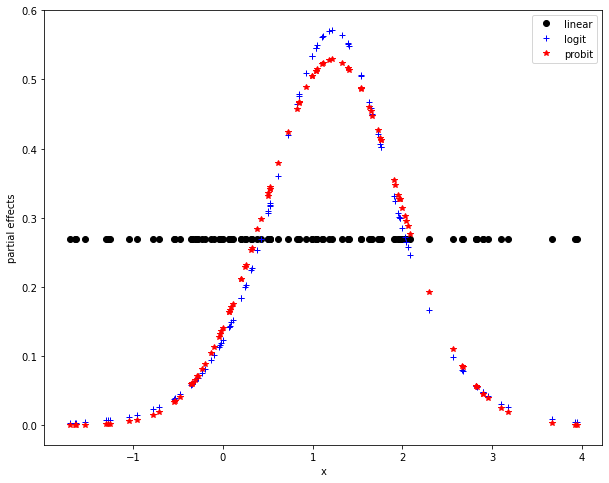

In [7]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as stats

# set the random seed:
np.random.seed(1234567)

y = stats.binom.rvs(1, 0.5, size=100)
x = stats.norm.rvs(0, 1, size=100) + 2 * y
sim_data = pd.DataFrame({'y': y, 'x': x})

# estimation:
reg_lin = smf.ols(formula='y ~ x', data=sim_data)
results_lin = reg_lin.fit()
reg_logit = smf.logit(formula='y ~ x', data=sim_data)
results_logit = reg_logit.fit(disp=0)
reg_probit = smf.probit(formula='y ~ x', data=sim_data)
results_probit = reg_probit.fit(disp=0)

# calculate partial effects:
PE_lin = np.repeat(results_lin.params['x'], 100)

xb_logit = results_logit.fittedvalues
factor_logit = stats.logistic.pdf(xb_logit)
PE_logit = results_logit.params['x'] * factor_logit

xb_probit = results_probit.fittedvalues
factor_probit = stats.norm.pdf(xb_probit)
PE_probit = results_probit.params['x'] * factor_probit


# plot APE's:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(x, PE_lin, color='black',
         marker='o', linestyle='', label='linear')
plt.plot(x, PE_logit, color='blue',
         marker='+', linestyle='', label='logit')
plt.plot(x, PE_probit, color='red',
         marker='*', linestyle='', label='probit')
plt.ylabel('partial effects')
plt.xlabel('x')
plt.legend()


>b. Estimates (Table)

In [8]:
# Example: Married Women's Labor Force Participation

import wooldridge as woo
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats

mroz = woo.dataWoo('mroz')

# estimate models:
reg_lin = smf.ols(formula='inlf ~ nwifeinc + educ + exper + I(exper**2) +'
                          'age + kidslt6 + kidsge6', data=mroz)
results_lin = reg_lin.fit(cov_type='HC3')

reg_logit = smf.logit(formula='inlf ~ nwifeinc + educ + exper + I(exper**2) +'
                              'age + kidslt6 + kidsge6', data=mroz)
results_logit = reg_logit.fit(disp=0)

reg_probit = smf.probit(formula='inlf ~ nwifeinc + educ + exper + I(exper**2) +'
                                'age + kidslt6 + kidsge6', data=mroz)
results_probit = reg_probit.fit(disp=0)

# manual average partial effects:
APE_lin = np.array(results_lin.params)

xb_logit = results_logit.fittedvalues
factor_logit = np.mean(stats.logistic.pdf(xb_logit))
APE_logit_manual = results_logit.params * factor_logit

xb_probit = results_probit.fittedvalues
factor_probit = np.mean(stats.norm.pdf(xb_probit))
APE_probit_manual = results_probit.params * factor_probit

table_manual = pd.DataFrame({'APE_lin': np.round(APE_lin, 4),
                             'APE_logit_manual': np.round(APE_logit_manual, 4),
                             'APE_probit_manual': np.round(APE_probit_manual, 4)})
print(f'table_manual: \n{table_manual}\n')

# automatic average partial effects:
coef_names = np.array(results_lin.model.exog_names)
coef_names = np.delete(coef_names, 0)  # drop Intercept

APE_logit_autom = results_logit.get_margeff().margeff
APE_probit_autom = results_probit.get_margeff().margeff

table_auto = pd.DataFrame({'coef_names': coef_names,
                           'APE_logit_autom': np.round(APE_logit_autom, 4),
                           'APE_probit_autom': np.round(APE_probit_autom, 4)})
print(f'table_auto: \n{table_auto}\n')


table_manual: 
               APE_lin  APE_logit_manual  APE_probit_manual
Intercept       0.5855            0.0760             0.0812
nwifeinc       -0.0034           -0.0038            -0.0036
educ            0.0380            0.0395             0.0394
exper           0.0395            0.0368             0.0371
I(exper ** 2)  -0.0006           -0.0006            -0.0006
age            -0.0161           -0.0157            -0.0159
kidslt6        -0.2618           -0.2578            -0.2612
kidsge6         0.0130            0.0107             0.0108

table_auto: 
      coef_names  APE_logit_autom  APE_probit_autom
0       nwifeinc          -0.0038           -0.0036
1           educ           0.0395            0.0394
2          exper           0.0368            0.0371
3  I(exper ** 2)          -0.0006           -0.0006
4            age          -0.0157           -0.0159
5        kidslt6          -0.2578           -0.2612
6        kidsge6           0.0107            0.0108



# 7) The Poisson Regression Model
## Example: Number of Arrests

In [9]:
import wooldridge as woo
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

crime1 = woo.dataWoo('crime1')

# estimate linear model:
reg_lin = smf.ols(formula='narr86 ~ pcnv + avgsen + tottime + ptime86 +'
                          'qemp86 + inc86 + black + hispan + born60',
                  data=crime1)
results_lin = reg_lin.fit()

# print regression table:
table_lin = pd.DataFrame({'b': round(results_lin.params, 4),
                          'se': round(results_lin.bse, 4),
                          't': round(results_lin.tvalues, 4),
                          'pval': round(results_lin.pvalues, 4)})
print(f'table_lin: \n{table_lin}\n')

# estimate Poisson model:
reg_poisson = smf.poisson(formula='narr86 ~ pcnv + avgsen + tottime +'
                                  'ptime86 + qemp86 + inc86 + black +'
                                  'hispan + born60',
                          data=crime1)
results_poisson = reg_poisson.fit(disp=0)

# print regression table:
table_poisson = pd.DataFrame({'b': round(results_poisson.params, 4),
                              'se': round(results_poisson.bse, 4),
                              't': round(results_poisson.tvalues, 4),
                              'pval': round(results_poisson.pvalues, 4)})
print(f'table_poisson: \n{table_poisson}\n')

# estimate Quasi-Poisson model:
reg_qpoisson = smf.glm(formula='narr86 ~ pcnv + avgsen + tottime + ptime86 +'
                               'qemp86 + inc86 + black + hispan + born60',
                       family=sm.families.Poisson(),
                       data=crime1)
# the argument scale controls for the dispersion in exponential dispersion models,
# see the module documentation for more details:
results_qpoisson = reg_qpoisson.fit(scale='X2', disp=0)

# print regression table:
table_qpoisson = pd.DataFrame({'b': round(results_qpoisson.params, 4),
                               'se': round(results_qpoisson.bse, 4),
                               't': round(results_qpoisson.tvalues, 4),
                               'pval': round(results_qpoisson.pvalues, 4)})
print(f'table_qpoisson: \n{table_qpoisson}\n')


table_lin: 
                b      se        t    pval
Intercept  0.5766  0.0379  15.2150  0.0000
pcnv      -0.1319  0.0404  -3.2642  0.0011
avgsen    -0.0113  0.0122  -0.9257  0.3547
tottime    0.0121  0.0094   1.2790  0.2010
ptime86   -0.0409  0.0088  -4.6378  0.0000
qemp86    -0.0513  0.0145  -3.5420  0.0004
inc86     -0.0015  0.0003  -4.2613  0.0000
black      0.3270  0.0454   7.1987  0.0000
hispan     0.1938  0.0397   4.8799  0.0000
born60    -0.0225  0.0333  -0.6747  0.4999

table_poisson: 
                b      se       t    pval
Intercept -0.5996  0.0673 -8.9158  0.0000
pcnv      -0.4016  0.0850 -4.7260  0.0000
avgsen    -0.0238  0.0199 -1.1918  0.2333
tottime    0.0245  0.0148  1.6603  0.0969
ptime86   -0.0986  0.0207 -4.7625  0.0000
qemp86    -0.0380  0.0290 -1.3099  0.1902
inc86     -0.0081  0.0010 -7.7624  0.0000
black      0.6608  0.0738  8.9503  0.0000
hispan     0.4998  0.0739  6.7609  0.0000
born60    -0.0510  0.0641 -0.7967  0.4256

table_qpoisson: 
                b 

# 8) The Tobit Model
## Example: Married Women's Annual Labor Supply 

In [10]:
import wooldridge as woo
import numpy as np
import patsy as pt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.base.model as smclass

mroz = woo.dataWoo('mroz')
y, X = pt.dmatrices('hours ~ nwifeinc + educ + exper +'
                    'I(exper**2)+ age + kidslt6 + kidsge6',
                    data=mroz, return_type='dataframe')

# generate starting solution:
reg_ols = smf.ols(formula='hours ~ nwifeinc + educ + exper + I(exper**2) +'
                          'age + kidslt6 + kidsge6', data=mroz)
results_ols = reg_ols.fit()
sigma_start = np.log(sum(results_ols.resid ** 2) / len(results_ols.resid))
params_start = np.concatenate((np.array(results_ols.params), sigma_start),
                              axis=None)

# extend statsmodels class by defining nloglikeobs:
class Tobit(smclass.GenericLikelihoodModel):
    # define a function that returns the negative log likelihood per observation
    # for a set of parameters that is provided by the argument "params":
    def nloglikeobs(self, params):
        # objects in "self" are defined in the parent class:
        X = self.exog
        y = self.endog
        p = X.shape[1]
        # for details on the implementation see Wooldridge (2019), formula 17.22:
        beta = params[0:p]
        sigma = np.exp(params[p])
        y_hat = np.dot(X, beta)
        y_eq = (y == 0)
        y_g = (y > 0)
        ll = np.empty(len(y))
        ll[y_eq] = np.log(stats.norm.cdf(-y_hat[y_eq] / sigma))
        ll[y_g] = np.log(stats.norm.pdf((y - y_hat)[y_g] / sigma)) - np.log(sigma)
        # return an array of log likelihoods for each observation:
        return -ll

# results of MLE:
reg_tobit = Tobit(endog=y, exog=X)
results_tobit = reg_tobit.fit(start_params=params_start, maxiter=10000, disp=0)
print(f'results_tobit.summary(): \n{results_tobit.summary()}\n')


results_tobit.summary(): 
                                Tobit Results                                 
Dep. Variable:                  hours   Log-Likelihood:                -3819.1
Model:                          Tobit   AIC:                             7654.
Method:            Maximum Likelihood   BIC:                             7691.
Date:                Sun, 07 Nov 2021                                         
Time:                        15:24:03                                         
No. Observations:                 753                                         
Df Residuals:                     745                                         
Df Model:                           7                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       965.3054    446.428      2.162      0.031      90.322    1840.289
nwifeinc         

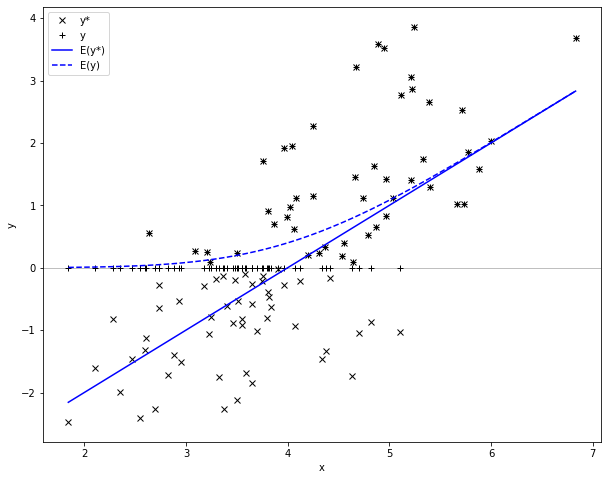

In [11]:
# Plot of the Conditional Means for Tobit (simulation)
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# set the random seed:
np.random.seed(1234567)

x = np.sort(stats.norm.rvs(0, 1, size=100) + 4)
xb = -4 + 1 * x
y_star = xb + stats.norm.rvs(0, 1, size=100)
y = np.copy(y_star)
y[y_star < 0] = 0

# conditional means:
Eystar = xb
Ey = stats.norm.cdf(xb / 1) * xb + 1 * stats.norm.pdf(xb / 1)

# plot data and conditional means:
fig, ax = plt.subplots(figsize=(10, 8))
plt.axhline(y=0, linewidth=0.5,
            linestyle='-', color='grey')
plt.plot(x, y_star, color='black',
         marker='x', linestyle='', label='y*')
plt.plot(x, y, color='black', marker='+',
         linestyle='', label='y')
plt.plot(x, Eystar, color='blue', marker='',
         linestyle='-', label='E(y*)')
plt.plot(x, Ey, color='blue', marker='',
         linestyle='--', label='E(y)')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

# 9) Censored/Truncated Regression Models
## Example: Duration of Recidivism   
Recidivism: Time it takes individuals released from prison to be arrested again.

In [12]:
import wooldridge as woo
import numpy as np
import patsy as pt
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.base.model as smclass

recid = woo.dataWoo('recid')

# define dummy for censored observations:
censored = recid['cens'] != 0
y, X = pt.dmatrices('ldurat ~ workprg + priors + tserved + felon +'
                    'alcohol + drugs + black + married + educ + age',
                    data=recid, return_type='dataframe')

# generate starting solution:
reg_ols = smf.ols(formula='ldurat ~ workprg + priors + tserved + felon +'
                          'alcohol + drugs + black + married + educ + age',
                  data=recid)
results_ols = reg_ols.fit()
sigma_start = np.log(sum(results_ols.resid ** 2) / len(results_ols.resid))
params_start = np.concatenate((np.array(results_ols.params), sigma_start),
                              axis=None)


# extend statsmodels class by defining nloglikeobs:
class CensReg(smclass.GenericLikelihoodModel):
    def __init__(self, endog, cens, exog):
        self.cens = cens
        super(smclass.GenericLikelihoodModel, self).__init__(endog, exog,
                                                             missing='none')

    def nloglikeobs(self, params):
        X = self.exog
        y = self.endog
        cens = self.cens
        p = X.shape[1]
        beta = params[0:p]
        sigma = np.exp(params[p])
        y_hat = np.dot(X, beta)
        ll = np.empty(len(y))
        # uncensored:
        ll[~cens] = np.log(stats.norm.pdf((y - y_hat)[~cens] /
                                          sigma)) - np.log(sigma)
        # censored:
        ll[cens] = np.log(stats.norm.cdf(-(y - y_hat)[cens] / sigma))
        return -ll


# results of MLE:
reg_censReg = CensReg(endog=y, exog=X, cens=censored)
results_censReg = reg_censReg.fit(start_params=params_start,
                                  maxiter=10000, method='BFGS', disp=0)
print(f'results_censReg.summary(): \n{results_censReg.summary()}\n')


<ipython-input-12-e827aa040448>:43: RuntimeWarning: divide by zero encountered in log
  ll[~cens] = np.log(stats.norm.pdf((y - y_hat)[~cens] /
/Users/randallr.rojas/anaconda2/lib/python3.8/site-packages/statsmodels/tools/numdiff.py:158: RuntimeWarning: invalid value encountered in double_scalars
  grad[k, :] = (f(*((x+ei,)+args), **kwargs) -
<ipython-input-12-e827aa040448>:43: RuntimeWarning: divide by zero encountered in log
  ll[~cens] = np.log(stats.norm.pdf((y - y_hat)[~cens] /


results_censReg.summary(): 
                               CensReg Results                                
Dep. Variable:                 ldurat   Log-Likelihood:                -1597.1
Model:                        CensReg   AIC:                             3216.
Method:            Maximum Likelihood   BIC:                             3274.
Date:                Sun, 07 Nov 2021                                         
Time:                        15:24:04                                         
No. Observations:                1445                                         
Df Residuals:                    1434                                         
Df Model:                          10                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0994      0.348     11.796      0.000       3.418       4.781
workprg       -0.0626   

In [13]:
## Example: Truncated regression simulation

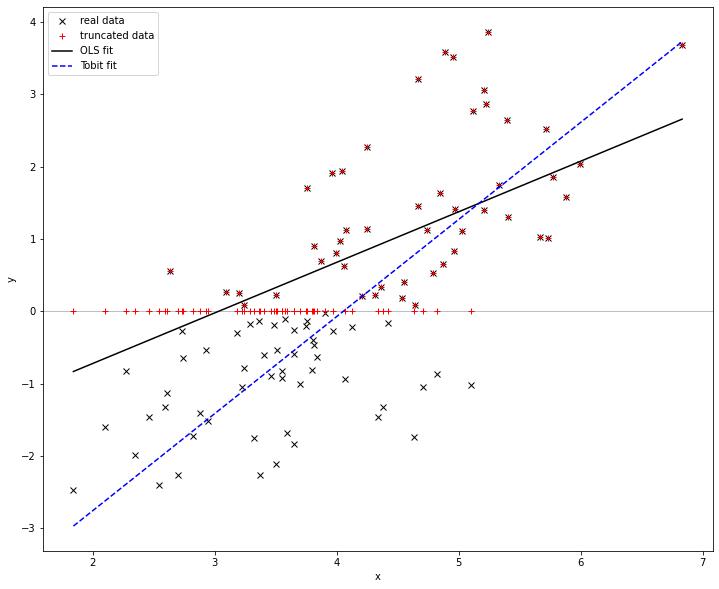

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.base.model as smclass

# set the random seed:
np.random.seed(1234567)

x = np.sort(stats.norm.rvs(0, 1, size=100) + 4)
xb = -4 + 1 * x
y_star = xb + stats.norm.rvs(0, 1, size=100)
y = np.copy(y_star)
y[y_star < 0] = 0

x_wc = pd.DataFrame({'const': 1, 'x': x})


# extend statsmodel class:
class Tobit(smclass.GenericLikelihoodModel):
    def nloglikeobs(self, params):
        X = self.exog
        y = self.endog
        p = X.shape[1]
        beta = params[0:p]
        sigma = np.exp(params[p])
        y_hat = np.dot(X, beta)
        y_eq = (y == 0)
        y_g = (y > 0)
        ll = np.empty(len(y))
        ll[y_eq] = np.log(stats.norm.cdf(-y_hat[y_eq] / sigma))
        ll[y_g] = np.log(stats.norm.pdf((y - y_hat)[y_g] / sigma)) - np.log(sigma)
        return -ll


# predictions:
reg_ols = sm.OLS(endog=y, exog=x_wc)
results_ols = reg_ols.fit()
yhat_ols = results_ols.fittedvalues

sigma_start = np.log(sum(results_ols.resid ** 2) / len(results_ols.resid))
params_start = np.concatenate((np.array(results_ols.params), sigma_start), axis=None)
reg_tobit = Tobit(endog=y, exog=x_wc)
results_tobit = reg_tobit.fit(start_params=params_start, disp=0)
yhat_tobit = np.dot(x_wc, np.transpose(results_tobit.params[0:2]))

# plot data and model predictions:
fig, ax = plt.subplots(figsize=(12, 10))
plt.axhline(y=0, linewidth=0.5, linestyle='-', color='grey')
plt.plot(x, y_star, color='black', marker='x',
         linestyle='', label='real data')
plt.plot(x, y, color='red', marker='+',
         linestyle='', label='truncated data')
plt.plot(x, yhat_ols, color='black', marker='',
         linestyle='-', label='OLS fit')
plt.plot(x, yhat_tobit, color='blue', marker='',
         linestyle='--', label='Tobit fit')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
